<a href="https://colab.research.google.com/github/CruzElizorios/aprendiendo-python/blob/main/Para_Entregar_Resoluci%C3%B3n_ProyectoFinalProgI_2024_Leandro_I%C3%B1aki_Julian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico: Análisis de Datos de la línea 144**
## Introducción
La linea 144 brinda atención, contención y asesoramiento a personas en situación de violencia de género. Esta línea fue creada en 2013 para cumplir con la ley Nº 26.485 (más información en: https://www.argentina.gob.ar/capital-humano/generos/linea-144).

Se dispone de archivos de datos sobre las llamadas recibidas por este número. Cada registro representa una llamada e incluye información como la fecha, la provincia, el género de la persona que llama, su edad, su nacionalidad, entre otros datos. Los mismos pueden consultarse y descargarse en el sitio https://www.datos.gob.ar/dataset/generos-base-datos-linea-144. En el mismo sitio pueden consultarse los campos con sus tipos de datos y descripción.

En este Proyecto Final se trabajaran con los datos correspondientes a los años 2020 al 2022 (no incluiremos los datos del año 2023 por no estar completos).




## Objetivo del Proyecto final
El objetivo primordial de este Proyecto Final es que el alumno demuestre un empleo adecuado de los elementos y construcciones del lenguaje de programación. Para ello se trabajará con los datos disponibles resolviendo ciertas consignas que se le presentaran en 3 etapas.

A lo largo de tres semanas, trabajarán en la lectura, manipulación y análisis de estos datos, así como en la creación de clases y métodos para comparar y visualizar los resultados.


Integrantes del grupo (comisión 2):
*   Elizondo Rios, Iñaki Cruz
*   Juarez, Leandro Santiago
*   Pereyra, Julián Bruno






## Consignas Semana 1:##






1. Descargar los archivos  `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` ejectundo el código que se le propone a continuación

In [ ]:
#No modificar este código que le permitirá bajar los archivos que necesita para trabajar

import requests
datosVG2020 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv"
datosVG2021 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv"
datosVG2022 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8-sig") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8-sig"))

    print("¡Archivo descargado con éxito!")

descargarCSV(datosVG2020, "datosVG2020.csv")
descargarCSV(datosVG2021, "datosVG2021.csv")
descargarCSV(datosVG2022, "datosVG2022.csv")


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Escribir una función `fusionarArchivosCSV` que tomando una lista de nombres de archivos (con el formato publicado de la linea 144), genere un nuevo archivo con el mismo formato con los datos de los archivos anteriores exceptuando aquellos registros con `fecha` y/o `prov_residencia_persona_en_situacion_violencia` nulos.


3. Invocar a la función `fusionarArchivosCSV` con un lista con los nombres `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` y generar un nuevo archivo llamado `datos_filtrados.csv`

In [ ]:
import csv
import matplotlib.pyplot as plt

def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """
  listaCompleta = []
  encabezado = ""
  #Lee los datos en cada archivo, agrega los datos que tienen una fecha en listaCompleta
  for archivo in lista_archivos_entrada:
    with open(archivo, mode='r') as dataset:
      contenido = csv.reader(dataset)
      encabezado = next(contenido)

      for linea in contenido:
        fecha = linea[0]
        provincia = linea[1]
        #verificación de que no estén vacias las fechas y las provincias
        if(fecha != '' and provincia != ''):
          #---modificación para que estandarizar los nombres de las provincias
          linea[1] = provincia.title()
          #---corrección de la escritura de Córdoba---
          if(provincia == "Cordoba"):
            linea[1] = "Córdoba"
          listaCompleta.append(linea)

  #crea un nuevo archivo csv con los datos que estan en listaCompleta
  with open(archivo_salida, mode='w') as datosCSV:
    contenidoTotal = csv.writer(datosCSV)
    #agrega los títulos en el archivo, en la primera linea
    contenidoTotal.writerow(encabezado)
    #escribe cada lista de la listaCompleta en el archivo nuevo
    for linea in listaCompleta:
      contenidoTotal.writerow(linea)
    return print(f"El archivo {archivo_salida} ha sido creado")

#help(fusionarArchivosCSV)

#invocar la función
fusionarArchivosCSV(["datosVG2020.csv","datosVG2021.csv","datosVG2022.csv"],"datos_filtrados.csv")

El archivo datos_filtrados.csv ha sido creado


4. Escribir una función *obtenerAnios* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y devuelva la lista de años que aparecen en el archivo.


In [ ]:
def obtenerAnios(nombre_archivo: str) -> list[int]:
  """
  obtenerAnios es una funcion que recibe recibe el nombre de un archivo (con el formato
  publicado de la linea 144) y devuelve la lista de años que aparecen en el archivo
  """
  listaAnios = []
  with open(nombre_archivo, mode = 'r') as dataset:
    contenidoDelArchivo = csv.reader(dataset)
    #salta la primera linea del archivo
    next(contenidoDelArchivo)

    for linea in contenidoDelArchivo:
      listaAnioMesDia = linea[0].split("-") # ejemplo: ["2020","12","30"]
      #verifica que el año no este adentro de listaAnios y si no esta lo agrega a la lista
      if(listaAnioMesDia[0] not in listaAnios):
        listaAnios.append(listaAnioMesDia[0])
  return listaAnios

#help(obtenerAnios)
obtenerAnios("datos_filtrados.csv")

['2020', '2021', '2022']

5. Escribir una función *crearEstadisticasAnualDesdeArchivo* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y devuelva:
- un diccionario donde las claves sean las provincias argentinas desde donde se realizaron llamadas ese año a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año, y
- el promedio de edades de las personas que llamaron a esa línea durante todo el año (como valor entero)




In [ ]:
def crearEstadisticasAnualDesdeArchivo(nombre_archivo: str, anio:int) -> tuple[dict[str,int],int] | None:
  """
  crearEstadisticasAnualDesdeArchivo recibe el nombre de un archivo (con el formato publicado de la linea 144)
  y un año y devuelve:
    - None si no hay datos de dicho año en el archivo
    - un diccionario contar_provincias: dict[str,int]
        donde las claves son las provincias argentinas desde donde se realizaron llamadas ese año
        a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año,
      y promedio_edades: int que es el promedio de edades de las personas que llamaron a esa línea durante todo el año
  """
  #verifica si el año que entra por argumento no esté dentro del archivo
  if (str(anio) not in obtenerAnios(nombre_archivo)):
    return None

  dicllamadoPorProvincia = {}
  sumaEdad = 0
  cantPersonaQllamo = 0

  with open(nombre_archivo, mode = 'r') as dataset:
    contenidoDelArchivo = csv.reader(dataset)
    next(contenidoDelArchivo)

    for linea in contenidoDelArchivo: #ejemplo: [2022,santa fe,mujer,30,...]
      fecha = linea[0]
      provincia = linea[1]
      edad = linea[3]

      listaAnioMesDia = fecha.split("-") #ejemplo: ["2022","06","28"]
      anioDelArchivo = int(listaAnioMesDia[0])

      if( anioDelArchivo != anio):
        continue
      #si la edad no esta vacia, la utiliza para el promedio
      if(edad != ''):
        sumaEdad += int(edad)
        cantPersonaQllamo += 1
      #se crea el diccionario con las provincias
      if(provincia in dicllamadoPorProvincia):
        dicllamadoPorProvincia[provincia] += 1
      else:
        dicllamadoPorProvincia[provincia] = 1

    promedio = int(sumaEdad / cantPersonaQllamo)
  return (dicllamadoPorProvincia, promedio)

 # help(crearEstadisticasAnualDesdeArchivo)
crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2020)

({'Tucumán': 948,
  'Buenos Aires': 16809,
  'Santiago Del Estero': 195,
  'Santa Fe': 1257,
  'San Juan': 212,
  'Catamarca': 73,
  'Neuquén': 182,
  'Mendoza': 1180,
  'Córdoba': 826,
  'Río Negro': 164,
  'Ciudad Autónoma De Buenos Aires': 5267,
  'Salta': 473,
  'Entre Ríos': 209,
  'Jujuy': 443,
  'Chaco': 238,
  'Chubut': 96,
  'San Luis': 152,
  'La Pampa': 25,
  'Misiones': 143,
  'Formosa': 117,
  'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 28,
  'Corrientes': 136,
  'Santa Cruz': 40,
  'La Rioja': 65},
 36)

# Semana 2 07/06/24

---





**6**. Definir una clase `EstadisticasAnual`

  con los siguientes atributos:
- `anio`: año asociado a la clase,
- `cant_llamadas_por_provincia`: diccionario donde las claves son las provincias argentinas desde donde se realizaron llamadas el año `anio` a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año
- `promedio_edades`: que es el promedio de edades de las personas que llamaron a esa linea durante el año `anio` (como valor entero)

  y los siguientes métodos:
- `__init__`
- `get_anio`
- `get_cant_llamadas_por_provincia`
- `get_promedio_edad_llamantes`
- `__str__`

    Para el año 2020:
    El promedio de edad de las denunciantes es: 36
    Las llamadas por provincia son: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago Del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Córdoba': 826, 'Río Negro': 164, 'Ciudad Autónoma De Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}


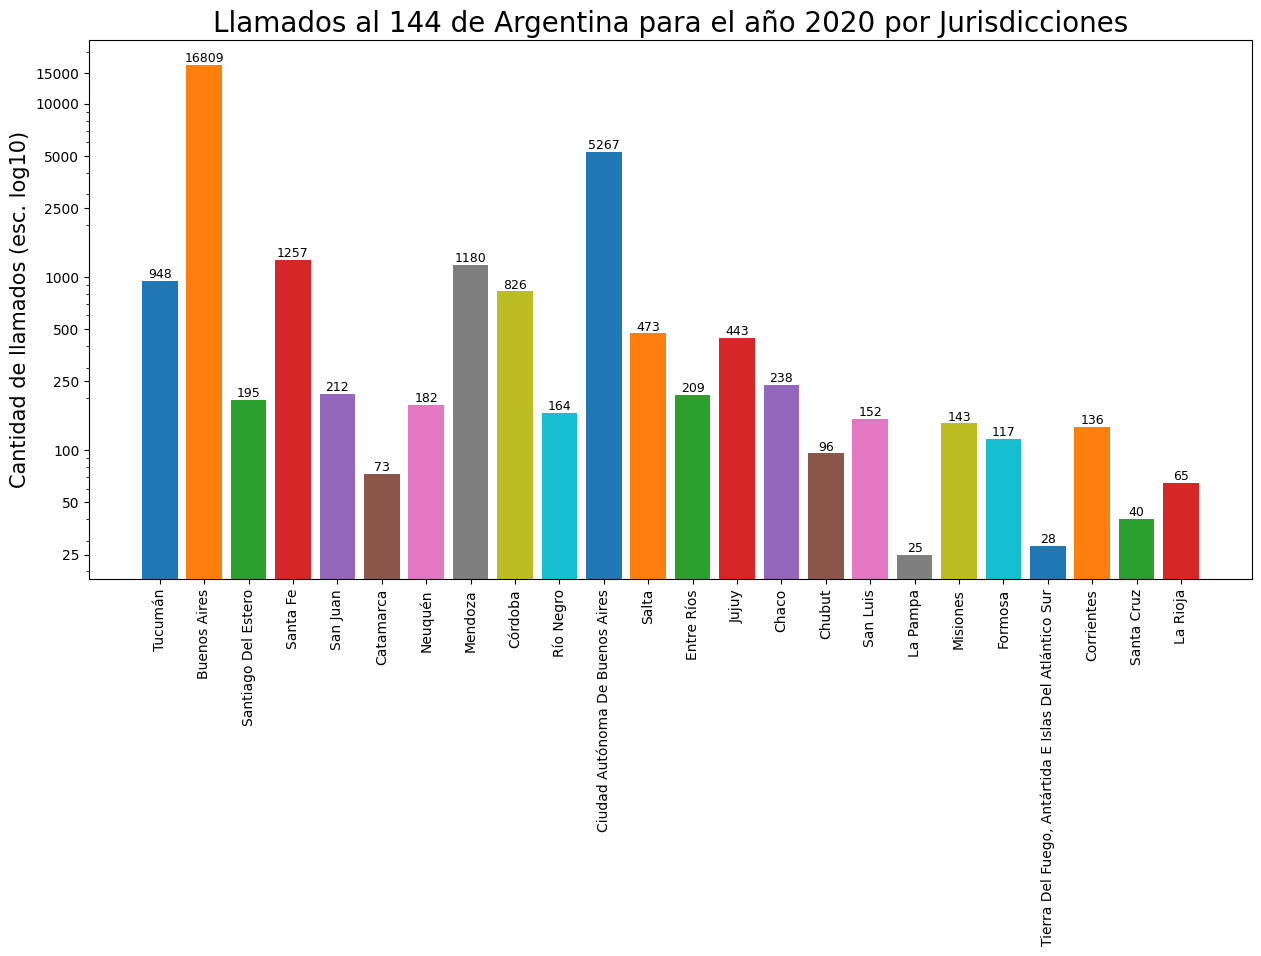

In [ ]:
"""
La clase EstadisticasAnual se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina en un año en particular
"""

class EstadisticasAnual:
  def __init__(self, anio: int, cant_llamadas_por_provincia:dict[str,int], promedio_edad_llamantes: int):
    self.ano = anio
    self.cant_llamadas_por_provincia = cant_llamadas_por_provincia
    self.promedio_edad_llamantes = promedio_edad_llamantes

  def getAnio(self) -> int:
    return self.ano

  def getCantLlamadasPorProvincia(self) -> dict[str,int]:
    return self.cant_llamadas_por_provincia

  def getPromedioEdadLlamantes(self) -> int:
    return self.promedio_edad_llamantes

  def __str__(self)->str:
    return f"""    Para el año {self.ano}:
    El promedio de edad de las denunciantes es: {self.promedio_edad_llamantes}
    Las llamadas por provincia son: {self.cant_llamadas_por_provincia}"""

  def graficarLLamadasPorProvincia(self) -> None:
    plt.figure(figsize = (15,7))
    plt.xticks(rotation = 90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.yscale('log')
    yticks_values = [25,50,100,250,500,1000,2500,5000,10000,15000]
    plt.yticks(yticks_values, [str(val) for val in yticks_values],fontsize=10)
    plt.ylabel('Cantidad de llamados (esc. log10)',fontsize=15)
    plt.title(f'Llamados al 144 de Argentina para el año {self.ano} por Jurisdicciones',fontsize=20)
    for provincia, llamadas in self.cant_llamadas_por_provincia.items():
      plt.bar(provincia, llamadas)
      plt.text(provincia, llamadas, str(llamadas), ha='center', va='bottom', fontsize=9)


datos2020 = EstadisticasAnual(2020,crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2020)[0],crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2020)[1])
print(datos2020)
datos2020.graficarLLamadasPorProvincia()

7. Escribir una función crearObjetosEstadisticasAnual que tome el nombre de un archivo y devuelva una lista de objetos de la clase EstadisticasAnual, donde cada objeto contiene información de cada año del cual se disponen datos en el archivo. Debe invocar a las funciones `obtenerAnios` y `crearEstadisticasAnualDesdeArchivo`

8. Invocar a la función anterior con el nombre de archivo  `datos_filtrados.csv`.

In [ ]:
def crearObjetosEstadisticasAnual(nombreArchivo: str) -> list[object]:
  """
  crearObjetosEstadisticasAnual recibe el nombre de un archivo y devuelve:
    una lista de objetos de la clase EstadisticasAnual según la cantidad de años
    que contenga el archivo; para lograr esto se utilizan las funciones:
      -obtenerAnios(): para obtener el conjunto de años a analizar
      -crearEstadisticasAnualDesdeArchivo(): para obtener el diccionario con los
      llamados por provincia y el promedio de edad de los denunciantes.
  """
  listaObjetos = []
  listaAnios = obtenerAnios(nombreArchivo) #Ejemplo: devuelve -> ['2020', '2021', '2022']

  for anio in listaAnios:
    ano = int(anio)
    dicLlamadosPorProvincia, promedio = crearEstadisticasAnualDesdeArchivo(nombreArchivo,ano) #Ejemplo: devuelve -> tupla(dic,promedio)
    #llamo a la clase EstadisticasAnual para instanciar un nuevo objeto
    objeto = EstadisticasAnual(ano,dicLlamadosPorProvincia,promedio)
    listaObjetos.append(objeto)
  return listaObjetos

listaEjdeObjetos = crearObjetosEstadisticasAnual("datos_filtrados.csv")
print(listaEjdeObjetos)

[<__main__.EstadisticasAnual object at 0x7c116839bdc0>, <__main__.EstadisticasAnual object at 0x7c116839b670>, <__main__.EstadisticasAnual object at 0x7c116839bd30>]


# Semana 3 14/06/24

---





9. Agregar el método `graficarLLamadasPorProvincia` a la clase `EstadisticasAnual` que muestre en un gráfico de barras la cantidad de llamadas que se hicieron en el año en cuestión desde cada provincia.

10. Realizar las gráficas para los años que se disponen de datos invocando a este método a partir de los objetos creados en el punto 8.

    Para el año 2020:
    El promedio de edad de las denunciantes es: 36
    Las llamadas por provincia son: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago Del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Córdoba': 826, 'Río Negro': 164, 'Ciudad Autónoma De Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}
    Para el año 2021:
    El promedio de edad de las denunciantes es: 35
    Las llamadas por provincia son: {'Buenos Aires': 13695, 'Ciudad Autónoma De Buenos Aires': 5272, 'La Rioja': 103, 'Santa Fe': 981, 'Córdoba': 700, 'Tucumán': 955, 'Mendoza': 844, 'San Luis': 153, 'Chubut': 75, 'Chaco': 190, 'Neuquén': 175, 'Santiago Del Estero': 135, 'Entre Ríos': 135, 'Jujuy': 342, 'Salta': 326, 'Misiones': 123,

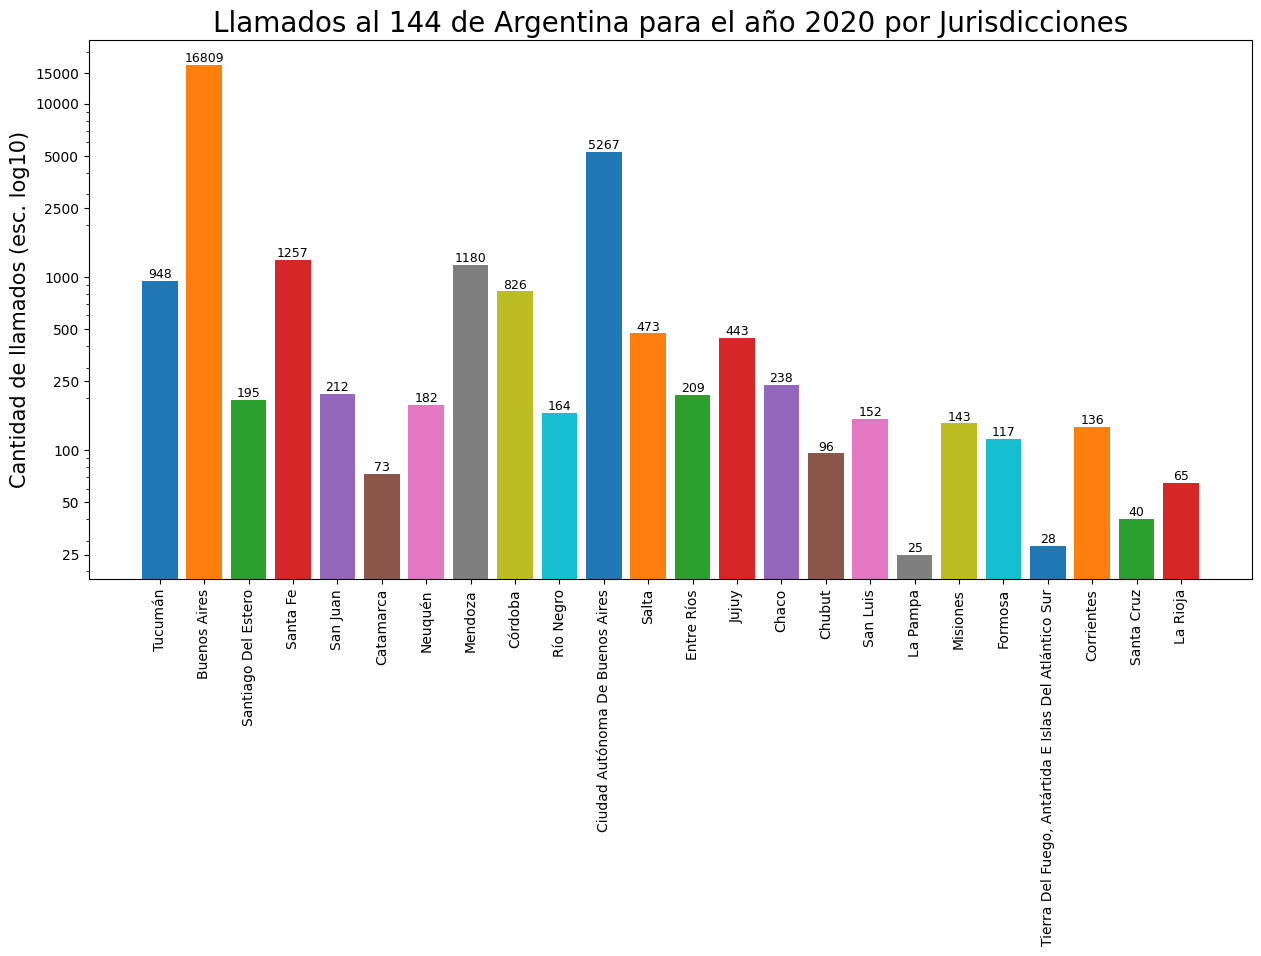

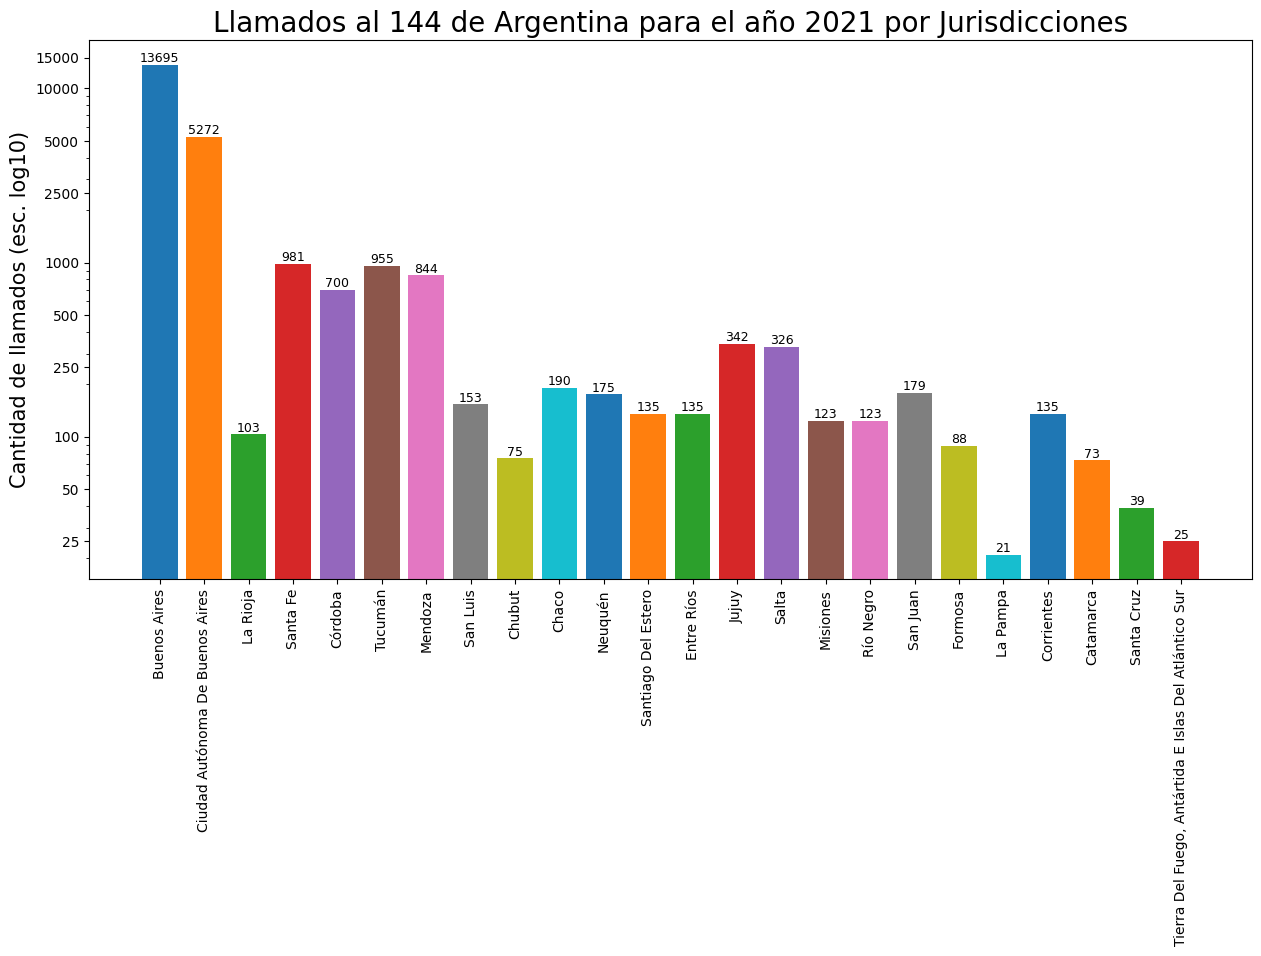

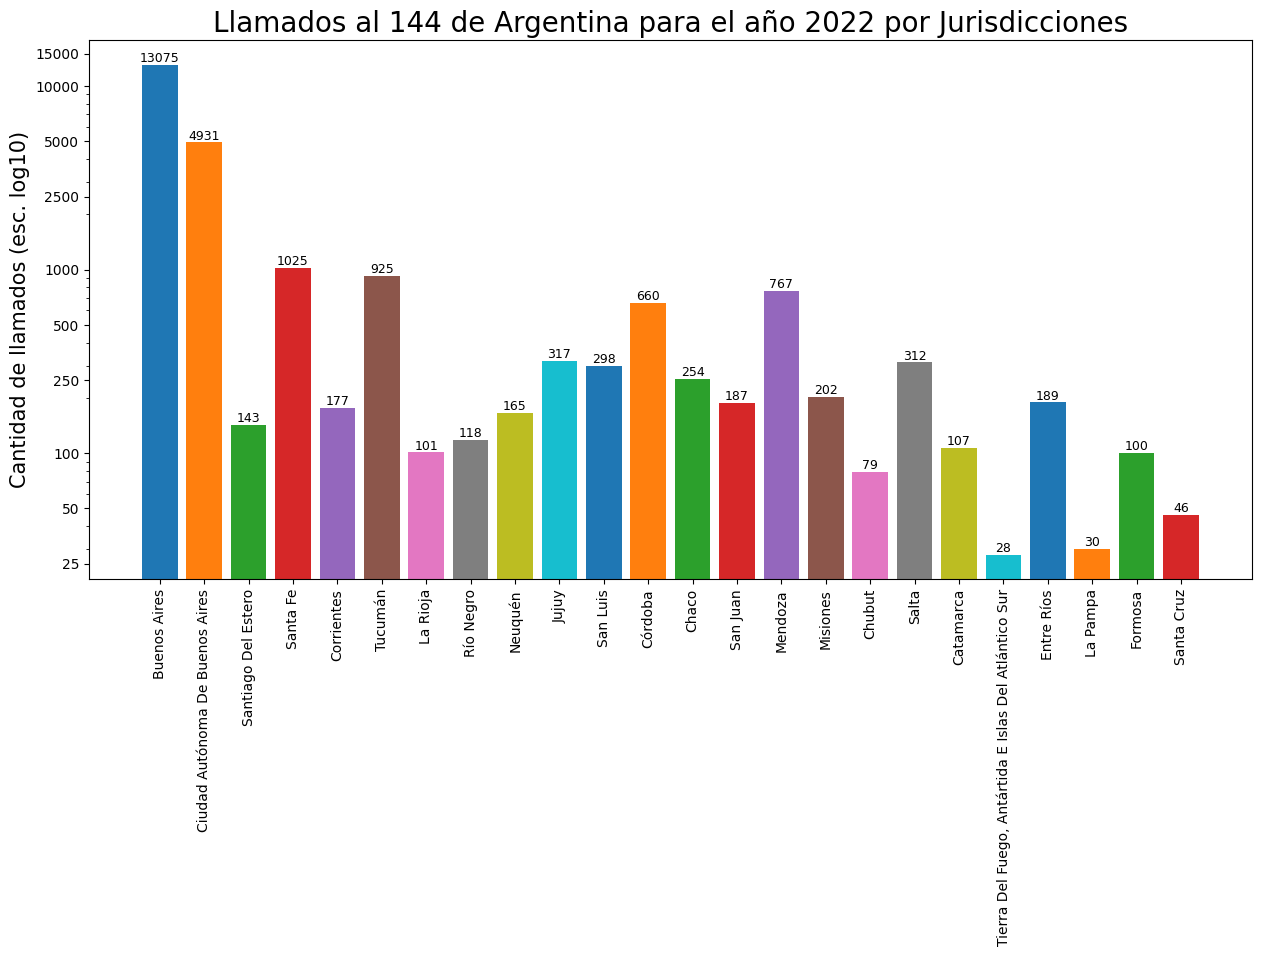

In [ ]:
listaObjetosEstadis = crearObjetosEstadisticasAnual("datos_filtrados.csv")
for objeto in listaObjetosEstadis:
  print(objeto)
  objeto.graficarLLamadasPorProvincia()


11. Definir una nueva clase `EstadisticasViolencia`

  con el atributo:
- `estadisticasAnuales`: lista de objetos de la clase `EstadisticasAnual`
  
  y los siguientes métodos:
- `__init__`
- `compararPromediosEdadesPorAnio`
- `minimaEdadPromedio`
- `compararGráficamenteDosAnios`
- `__str__`

In [ ]:
"""
La clase EstadisticasViolencia se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina, para todos los años
que se disponga de datos
"""
class EstadisticasViolencia:
  def __init__(self, estadisticasAnuales: list[EstadisticasAnual:object]):
    self.estadisticasAnuals = estadisticasAnuales

  def compararPromediosEdadesPorAnio(self):
    dicAnioPromEdad = {}
    for objeto in self.estadisticasAnuals:
      promedioEdad = objeto.getPromedioEdadLlamantes()
      nombreClave = str(objeto.getAnio())
      dicAnioPromEdad[nombreClave] = promedioEdad
    #grafico de barras
    plt.figure(figsize = (15,7))
    plt.xticks(rotation = 0, fontsize=12)
    plt.yticks(fontsize=10)
    plt.xlabel('Años',fontsize=15)
    plt.ylabel('Edad promedio en años',fontsize=15)
    plt.title(f'Promedio de Edades por Año',fontsize=20)
    #para lograr que las barras tengan distintos colores y etiqueta de valor
    for provincia, llamadas in dicAnioPromEdad.items():
      plt.bar(provincia, llamadas,width=0.4)
      plt.text(provincia, llamadas, str(llamadas), ha='center', va='bottom', fontsize=15)

  def minimaEdadPromedioyAnio(self):
    minPromEdad = 1000
    anioDelMinPromEdad = 0
    for objeto in self.estadisticasAnuals:
      edad = objeto.getPromedioEdadLlamantes()
      #a igual de edad promedio, toma el año más reciente como valor mínimo
      if(minPromEdad >= edad):
        minPromEdad = edad
        anioDelMinPromEdad = objeto.getAnio()
    print(f"El año con menor edad promedio es: {anioDelMinPromEdad} y el promedio de edad del denunciante es: {minPromEdad}")

  def compararGraficamenteDosAnios(self,anio1, anio2):
    lista2dic = []
    listaAnio = []
    for objeto in self.estadisticasAnuals:
      anioObjeto = objeto.getAnio()
      if(anioObjeto == anio1 or anioObjeto == anio2):
        dicProvincias = objeto.getCantLlamadasPorProvincia()
        anioEst = objeto.getAnio()
        lista2dic.append(dicProvincias)
        listaAnio.append(anioEst)

    listaValores1 = []
    listaValores2 = []
    for prov in lista2dic[0].keys():
      valores1 = lista2dic[0][prov]
      valores2 = lista2dic[1][prov]
      listaValores1.append(valores1)
      listaValores2.append(valores2)
    #grafico de linea comparativo
    plt.figure(figsize = (15,7))
    plt.xticks(rotation = 90, fontsize=10)
    plt.xlabel('jurisdicciones',fontsize=15)
    plt.ylabel('cantidad de llamados (esc. log10)',fontsize=15)
    plt.title(f'Comparativo de llamados por Año',fontsize=20)
    plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
    plt.yscale('log')
    yticks_values = [25,50,100,250,500,1000,2500,5000,10000,15000]
    plt.yticks(yticks_values, [str(val) for val in yticks_values],fontsize=10)
    plt.plot(lista2dic[0].keys(), listaValores1, label = f'año: {listaAnio[0]}', color = 'tab:purple', marker = 'o')
    plt.plot(lista2dic[0].keys(), listaValores2, label = f'año: {listaAnio[1]}', color = 'tab:orange', marker = 'v')
    plt.legend(loc = 'upper right')
    plt.show()

  def __str__(self):
    info = "Estadisticas anuales de la linea 144: \n"
    for objeto in self.estadisticasAnuals:
      info = info + objeto.__str__() + "\n"
    return info

12. Crear un objeto instanciando la clase `EstadisticasViolencia` que contenga los datos de todos los años disponibles.
13. Invocar a cada uno de los métodos de la clase con el objeto creado en el punto anterior. Compare gráficamente dos años de su elección.

In [ ]:
#se crea la lista con los objetos de clase EstadisticasAnual
listaEstadisticaAnual = crearObjetosEstadisticasAnual("datos_filtrados.csv")
#se instancia un objeto de clase EstadisticasViolencia
infoDisponible = EstadisticasViolencia(listaEstadisticaAnual)
print(infoDisponible)
infoDisponible.minimaEdadPromedioyAnio()
infoDisponible.compararPromediosEdadesPorAnio()
infoDisponible.compararGraficamenteDosAnios(2020,2022)

NameError: name 'EstadisticasViolencia' is not defined

Integrantes del grupo (comisión 2):

*   Elizondo Rios, Iñaki Cruz
*   Juarez, Leandro Santiago
*   Pereyra, Julián Bruno



